# Importing dependencies

In [158]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import Sequential, layers, losses
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.utils import class_weight
from keras.layers import Dropout , Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.initializers import glorot_uniform 
from sklearn.model_selection import train_test_split

# Exploratory Data Analysis 

In [159]:
#Data collection and preprocessing
df = pd.read_csv('Breast_Cancer.csv')
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [187]:
df.tail()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
4019,62,1,1,0,0,0,0,2,1,9,1,1,1,1,49,0
4020,56,2,0,1,1,2,0,2,1,46,1,1,14,8,69,0
4021,68,2,1,1,0,1,0,2,1,22,1,0,11,3,69,0
4022,58,0,0,1,0,1,0,2,1,44,1,1,11,1,72,0
4023,46,2,1,1,0,1,0,2,1,30,1,1,7,2,100,0


In [160]:
#check duplicate data 
def check_duplicate(df):
    if df.duplicated().all():
        return  'There are duplicate Data in Data Frame Nedded To be  removed . ' 
    else :
        return 'Data Is clean ,No Duplicate Data Found .'
check_duplicate(df)

'Data Is clean ,No Duplicate Data Found .'

In [188]:
#Summary Statistics
#To get a summary of the numerical columns in the data, we can use the some function.
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(4024, 16)
##################### Types #####################
Age                       int64
Race                      int32
Marital Status            int32
T Stage                   int32
N Stage                   int32
6th Stage                 int32
differentiate             int32
Grade                     int32
A Stage                   int32
Tumor Size                int64
Estrogen Status           int32
Progesterone Status       int32
Regional Node Examined    int64
Reginol Node Positive     int64
Survival Months           int64
Status                    int32
dtype: object
##################### NA #####################
Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progeste

<AxesSubplot:>

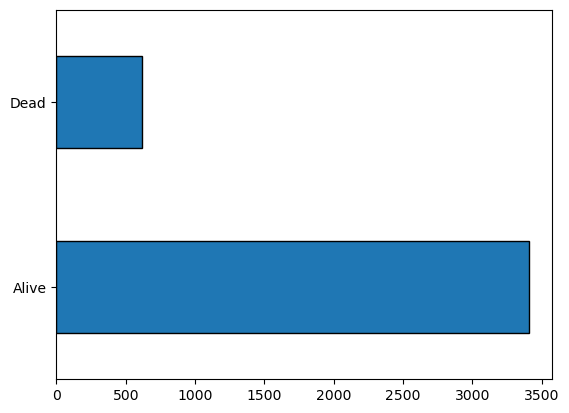

In [162]:
#Distribution of the target column
df['Status'].value_counts().plot(kind='barh',edgecolor='black')

In [163]:
#Turn categorical data into numerical
le = LabelEncoder()
df['Race'] = le.fit_transform(df['Race'])
df['Marital Status'] = le.fit_transform(df['Marital Status'])
df['N Stage'] = le.fit_transform(df['N Stage'])
df['6th Stage'] = le.fit_transform(df['6th Stage'])
df['differentiate'] = le.fit_transform(df['differentiate'])
df['Grade'] = le.fit_transform(df['Grade'])
df['A Stage'] = le.fit_transform(df['A Stage'])
df['Estrogen Status'] = le.fit_transform(df['Estrogen Status'])
df['Progesterone Status'] = le.fit_transform(df['Progesterone Status'])
df['Status'] = le.fit_transform(df['Status'])
df['T Stage '] = le.fit_transform(df['T Stage '])

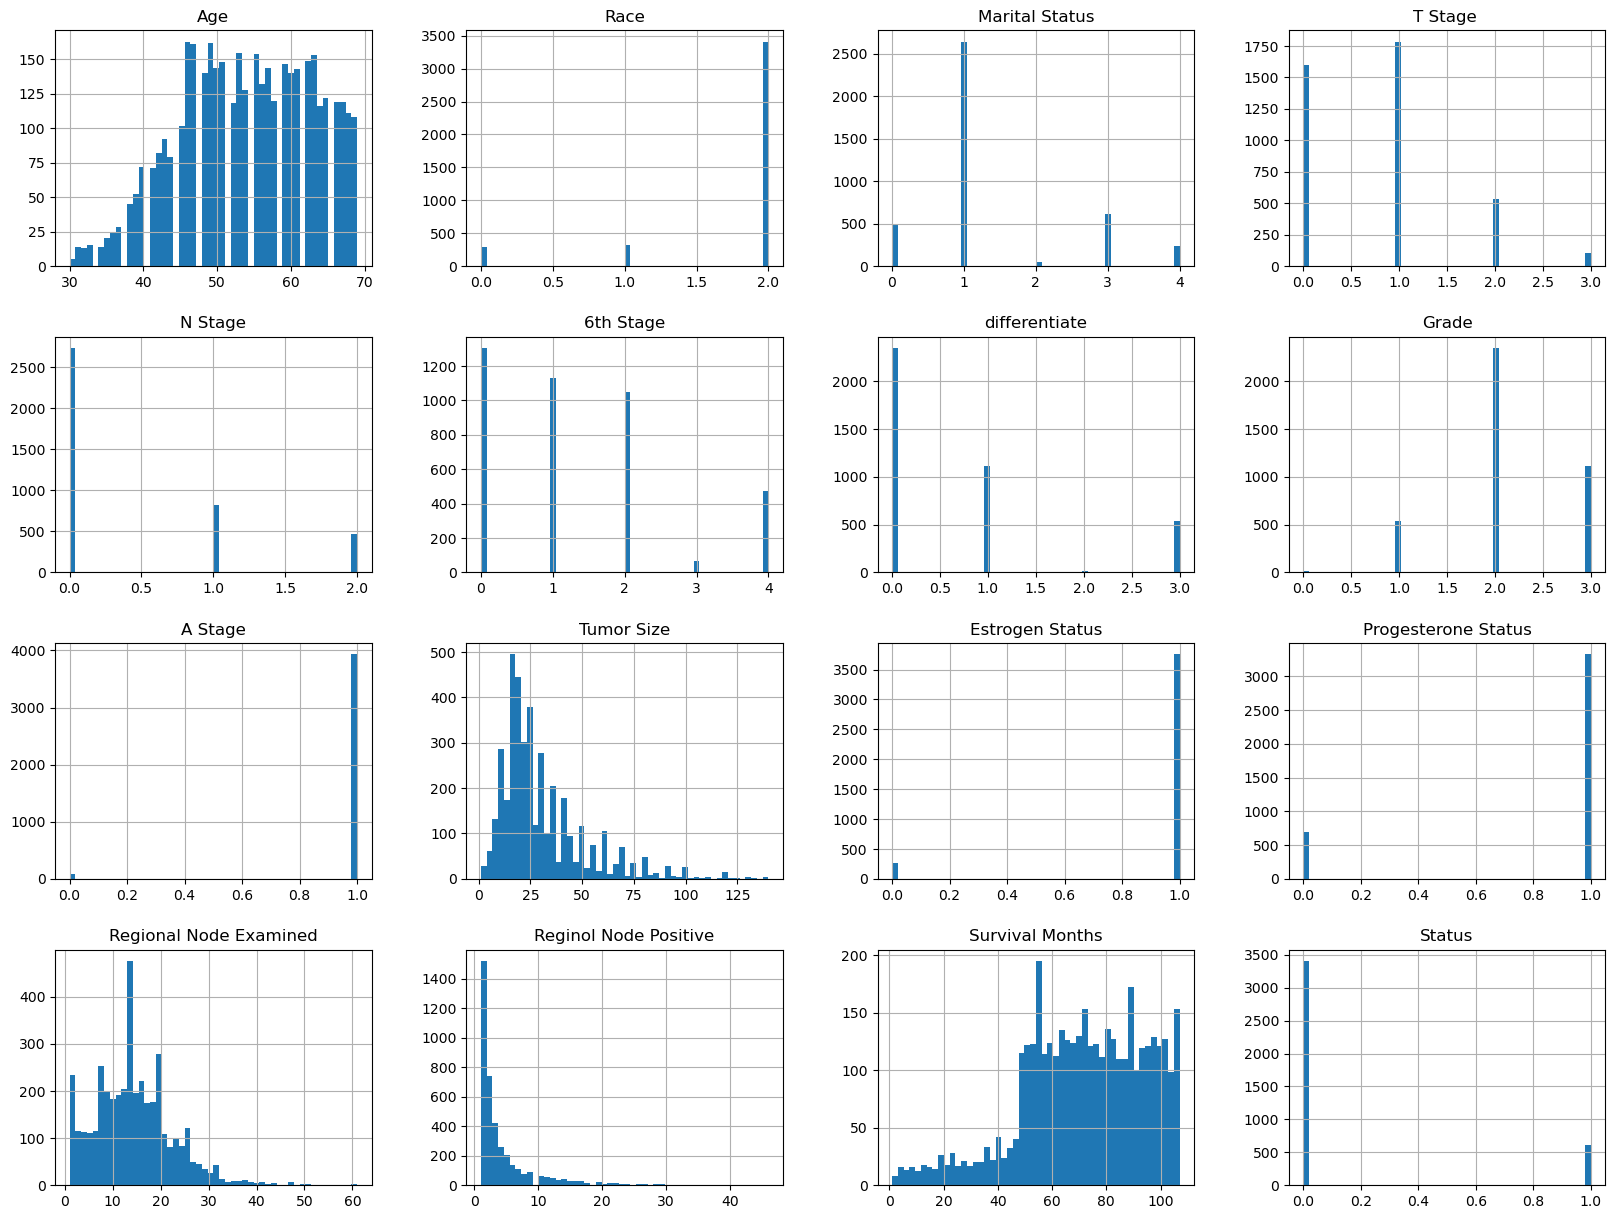

In [164]:
# Plot histograms of the numerical columns
df.hist(bins=50, figsize=(20, 15))
plt.show()

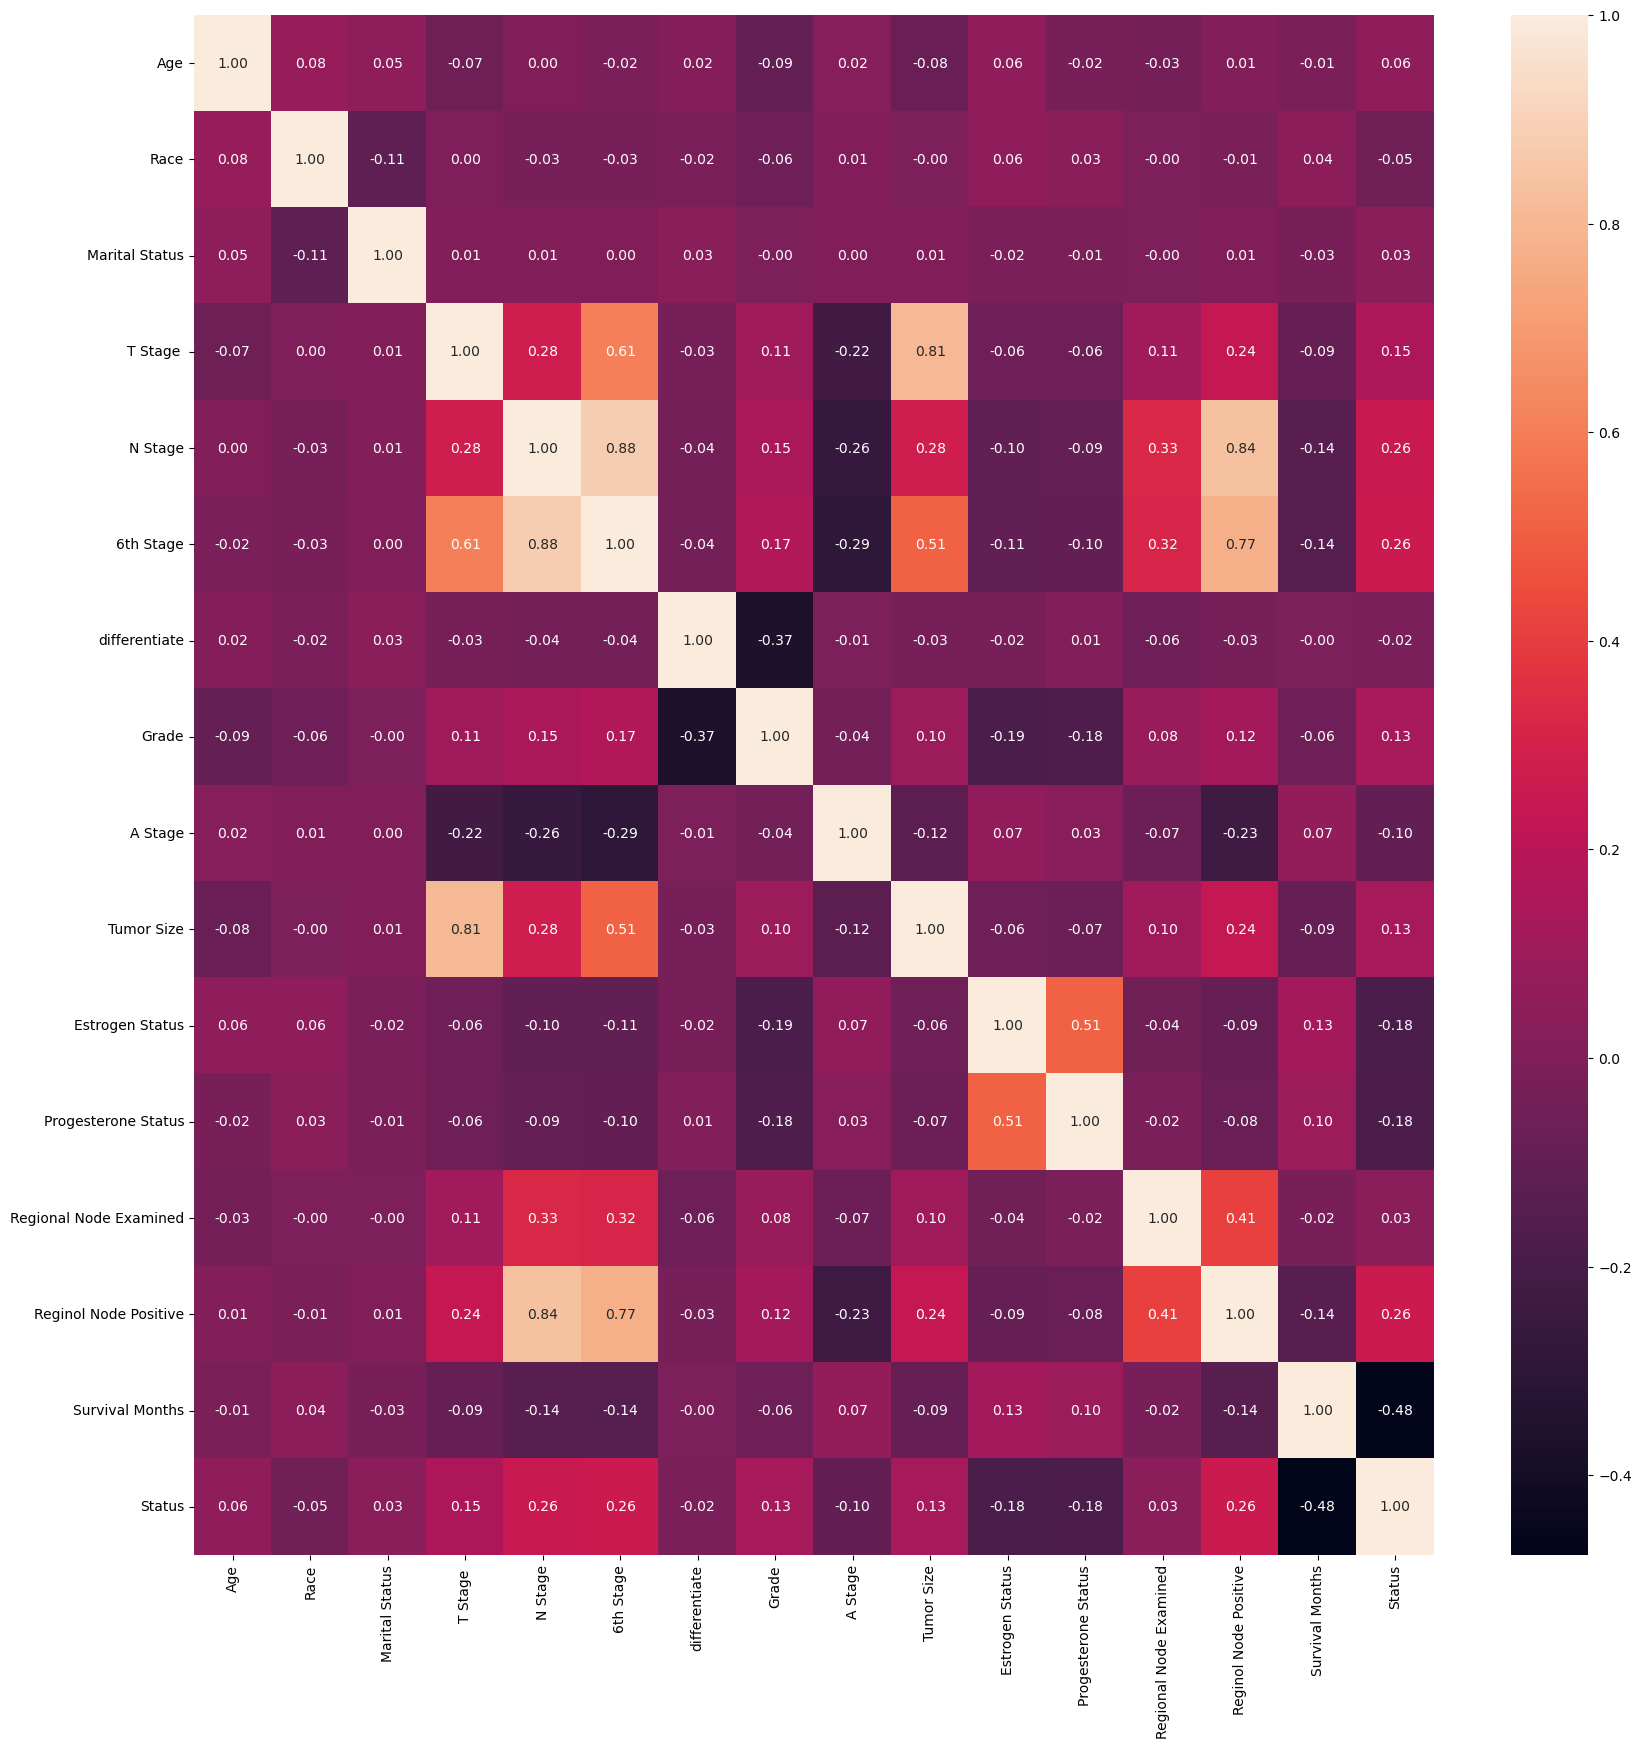

In [166]:
#Correlations
# Find the correlation between the features
corr = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

# Train Test Split

In [167]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

In [168]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

# Class weighting

In [189]:
print("Class weighting...")
class_weights = class_weight.compute_class_weight(
                                                  'balanced',
                                                  classes=np.unique(np.ravel(train_labels, order='C')),
                                                  y=np.ravel(train_labels, order='C'))

class_weight_dict = dict(enumerate(class_weights))
print(class_weight_dict)

Class weighting...
{0: 0.5912931667891257, 1: 3.238430583501006}


# Normalization Layer

In [180]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[53.865795    1.7713574   1.3777574   0.7974525   0.4392669   1.3336434
   0.6859274   2.1317177   0.97576886 30.810802    0.93414104  0.8254116
  14.3960905   4.168064   71.43554   ]]


# Regression with a Deep Neural Network (DNN)

In [196]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(8,8))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print(f'Actual is 0 and Prediction is 0: ', cm[0][0])
    print(f'Actual is 0 and Prediction is 1: ', cm[0][1])
    print(f'Actual is 1 and Prediction is 0: ', cm[1][0])
    print(f'Actual is 1 and Prediction is 1: ', cm[1][1])
    print(f'Total Correct Prediction: {np.sum(cm[0][0] + cm[1][1])} / {np.sum(cm)}')

In [205]:
model = Sequential([
      layers.Dense(256, activation='relu', kernel_initializer='he_normal'),
      layers.Dropout(0.2),
      layers.Dense(128),
      layers.Dense(1, activation='sigmoid')
  ])

In [206]:
es = EarlyStopping(monitor='val_accuracy', verbose=1, patience=20, mode='max', restore_best_weights=True)
LR = 1e-4
EPOCHS = 200
#optim = Adam(learning_rate=LR, decay=LR / EPOCHS)
optim=tf.keras.optimizers.legacy.Adam(
    learning_rate=LR)

model.compile(optimizer=optim, 
              loss=losses.binary_crossentropy, metrics=['accuracy'])

In [207]:
%%time
history = model.fit(
    train_features,
    train_labels,
    epochs=EPOCHS,
    verbose=0,
    validation_split = 0.2,
    callbacks=[es],
    class_weight=class_weight_dict)

Restoring model weights from the end of the best epoch: 16.
Epoch 36: early stopping
CPU times: total: 15.5 s
Wall time: 9.55 s


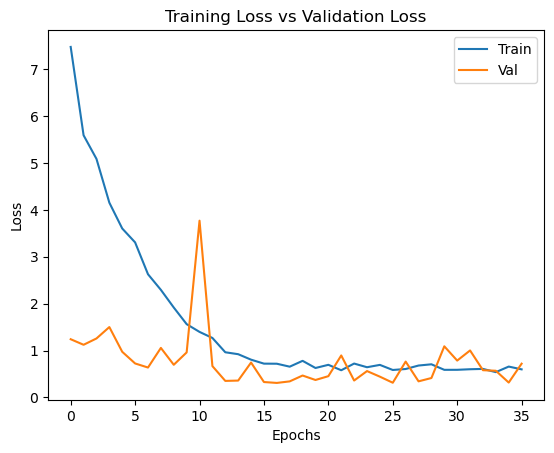

In [208]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Val'])

# Model Evaluation

In [184]:
print("[INFO] Calculating model accuracy")
train_scores = model.evaluate(train_features, train_labels)
test_scores = model.evaluate(test_features, test_labels)
print(f"Test Accuracy (on train dataset): {train_scores[1]*100}")
print(f"Test Accuracy (on test dataset): {test_scores[1]*100}")

[INFO] Calculating model accuracy
26/26 [==============================] - 0s 2ms/step - loss: 0.3178 - accuracy: 0.9006
Test Accuracy (on train dataset): 89.06492590904236
Test Accuracy (on test dataset): 90.06211161613464


In [185]:
prediction = np.round(model.predict(test_features))
print(classification_report(test_labels, prediction))

26/26 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       686
           1       0.69      0.61      0.64       119

    accuracy                           0.90       805
   macro avg       0.81      0.78      0.79       805
weighted avg       0.90      0.90      0.90       805



26/26 [==============================] - 0s 1ms/step
Actual is 0 and Prediction is 0:  657
Actual is 0 and Prediction is 1:  29
Actual is 1 and Prediction is 0:  47
Actual is 1 and Prediction is 1:  72
Total Correct Prediction: 729 / 805


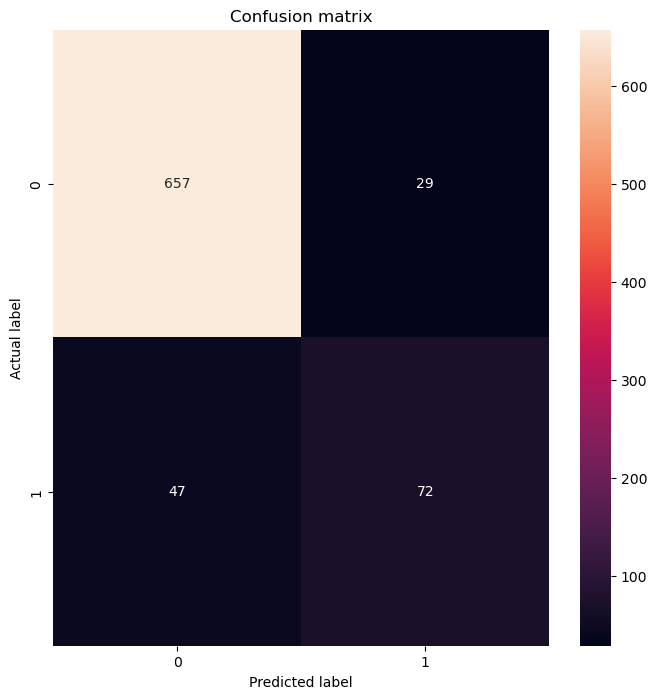

In [209]:
# 0 is 'alive', 1 is 'not alive'
test_predictions_baseline = model.predict(test_features)
plot_cm(test_labels, test_predictions_baseline)